<a href="https://colab.research.google.com/github/DrJesusNaranjo/Projects/blob/main/9oct_modelo_para_EMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'idridgrade:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4733359%2F8030615%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D90931fafd8e6d632bc3ead82c14c2f17a0ae975bfd760a605fafc96d449de3402c5d998f66d367be3c46140c921b0996c6fe0f28d6825254d52674f90b67e818f8e1cdde3895a57e94e2f61cba1a073715051f7abfb8bd8dd12cc3fd56c766697950e3e64d86234c7f20813c996bb5290d798bef870b9ea6fcfe43884ed76275166b16cf3189b5ba07053e1a86e3c9a55196c3abc95e7e7ec93286d14b96be076e78eec94517bdf55d307255d14e391d13515848b9d54a449a0030bb84fc91855f822666a00e1c817f20a037ef0d3dd87d1bfb9255f4cabc52e837a1f71223913bc83cf5fb9ff68862e6be862c3bf4d246ba0e27c23f85ac33de03b8928963c5,idrid-labels-disease:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4811846%2F8139084%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D95b144f947aabe742539257e24b401a14528f848f3e803b3abf8ab79bf54cce4d6ed5f7704575d9bc48435268b16d2621a328733123f1e919a1939f926337491f9bc18848f1ca738a4a322113a4cf9c0339380309c4304daea8999fe041907660300db2604a1e77b5921c69f68a646a0da0abb5e3006310e5ca73ebfcd35a11c39ddce11e9977aa4791730118a817b0805a8e688dfe7d3829b7ba2859bb21c2e65a72b1b903bdbb480f8fac175b4c8c25e86ffbd54286ff874c6ad0d99658f65b41d960cbb03d5bd9d13fc1bd5bf938e560b99e45c19ecce3c74ad7dcf63667127e17ee2e3304167d8a315f439bbe08f3aecd8fea0c550f10a6e9a3ae996726f,idridbentest:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4821681%2F8152304%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9283c1662cf10bc316133bd9abde021fe3a5d9164698c500284c490b957bd20486ee657eafc12eb8dec5b0581677921331703913dafc810685ca39e4615813db3016db56349d219ab83c413bd62e1fecb862cf71791521a3942f8086d47cf79917f024a953c8a9fb113fa8e55f4070146f3220c9ab3bd197d625e8e2938128437287159e17910bfc8b2988c9923d481ee1bc0343b3e1e7c94f2d597ef42cb001f70587ee8f130f45d5f175c58f71492248ec26ea89e12734a1177f374d2e9812e9ad7aabcec045b9f8b7b74d78d31972129ffc8667518a09e66f36cda1e7a53e60c7dfab3c07a9beca63128a61f5cac5aaeeb45de7334d01157c4ba1ea7e86ac,idridbentraining:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4953764%2F8340539%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dac61e713c679e4d72a86556a7fcb0cc1362683b5951507696fdc74592f794a6bcfdbabffe86a6b26afc6c80cf8ad7af10778068fdd6c583719e1512abf4a079d021be5d4bb4de5b4cc88b608a61f1ad6a11acfd0e0584f2a7b42ab55ffd3291c8d6bbdf534d58b068b3798e878f31de4e5ea1da8b99551a3a2076a4817a49c9d474a45b98bfdfba2ea4b96958b2119b7a450a2f41d69a25fc2865659360bb9b2d7ace9f431d53b7ecafd487847757d0030685f831bae06a93e950eeac9e4fac5f02cafa70e5a730819005b133a1c98278403868632c9e6d9e5ebce90e48d87ec25f72adc81151beaa3906af2f489a208e462bb5417c78982edb23ef0738d5e27,inception-v3/tensorflow2/classification/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F2320%2F3107%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db939395f68206e9d14fec96e018f200fee17eb7da47cc0d362a77f77b8757c67433b05407f673230db2b0d54ce1739354307242628cfbc1156fc8726cbfed8e8b4975bada0536101d2e5e0df302e1297fc54e612166cf095e90f6e103ec281d096cb2054d7314d0f883a11b1e862f656e0882d8537f7cbed6d20bd991be654bece2c26a685504befc5b32d9dc288a500377d00e22ea722d04dfc583cacd60a4e239844baf47a4a3256e292dfc941d8c13c4d6f25782066fdff95575488930c07471ed896aea9689be004ef3fe402bfe566a963cab12ca4841463c9131cd870f3877cc1b117d885576e86e4f67dd1be3ba9a384902459daaaf508f4a15b8c4860,densenet/keras/densenet121_imagenet/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F4590%2F6072%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T142433Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c8789d27e1a9bb359eb4bc7d1157c44498769eb5edb04a889929b9c83b4b904934a0be99a38918367d80d1d79b539d39a1094d38e203c4aa6a82aa5a711bfe0d7459a75abb83cae91e5ca18f68e8ef491c0b48854afdf3fd300db633200cac487a0b0250f17c07d342644c98e9227ac8aa9a4bb0c19ac519f8bcc33b2dce503bd9d552cb67faf3544121c3ab1d8a39f5ba5b397840d9f400298a45d532549483f96045b7c9993621c6e73d3fbe13f16b2b7c06d3fe1e9d039ef0da5e99d9cbbd500a8fbcf6ab99dc34168762cea699193c474b707ba57d59fd4d568c654fac74dd0ba49ba9c579603d8fbf0c602c88db80ede28c3c0cc9b857b4c40959dfbe0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 198278694 bytes downloaded
Downloaded and uncompressed: idridgrade
[==================================================] 1939 bytes downloaded
Downloaded and uncompressed: idrid-labels-disease
[==================================================] 233954160 bytes downloaded
Downloaded and uncompressed: idridbentest
[==================================================] 909397937 bytes downloaded
Downloaded and uncompressed: idridbentraining
[==================================================] 88870584 bytes downloaded
Downloaded and uncompressed: inception-v3/tensorflow2/classification/2
[==================================================] 26288763 bytes downloaded
Downloaded and uncompressed: densenet/keras/densenet121_imagenet/2
Data source import complete.


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp, primero no pasaba nada y ahora me marca error
from sklearn.metrics import roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
df = pd.read_csv("/kaggle/input/idrid-labels-disease/a. IDRiD_Disease Grading_Training Labels.csv")

#quiero solo las primeras 3 columnas pues por alguna razon me salen hasta 11 y de la 4 en adelante es solo NaN

#le voy a calar con 2 columnas para ver
#df=df.iloc[:,[0, 1, 2]]#con este codigo pude seleccionar las columnas que queria, iloc es para integer nose que (habia una bronca con el tiupo de dato supopngo)

df=df.iloc[:,[0,2]]
df.head()

#datos de las etiquetas
#image No: Name (serial number) of deidentified and renamed patient image.
#DR Grade: DR severity level in range 0 (No apparent DR) to 4 (Severe DR).
#Risk of DME: Macular edema severity level in range 0 (No DME) to 2 (Severe DME).

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Image name  Risk of macular edema 
0  IDRiD_001                       2
1  IDRiD_002                       2
2  IDRiD_003                       2
3  IDRiD_004                       2
4  IDRiD_005                       0

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
import os
import random
from tqdm import tqdm

#dataset_dir = "/kaggle/input/idridgrade/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv"
#le voy a calar con otra ruta para el dataset, el qu subio andre
#dataset_dir = "/kaggle/input/idridgrade/B. Disease Grading/1. Original Images/a. Training Set"

#este dataset es el de IDRiD pero con el filtro de ben
dataset_dir = "/kaggle/input/idridbentraining/training"


image_size = 224 #segun recuerdo este valor lo puedo ponr mas alto para mas pixeles y busque mejor, pero mayor costo computacional
num_classes = 3
#aqui esta el dataaugmentation
# Create an ImageDataGenerator for data augmentation
#original que me explico andre
#datagen = ImageDataGenerator(
 #       horizontal_flip=True,#True,originalmente era true pero no quiero que gire imagenes ni nada de eso
  #      rotation_range=40,#20,originalmente se movia 20 grados, pero tampoco quiero eso, asi que le pondre 0
   #     featurewise_center=True,
    #    featurewise_std_normalization=True,
    #)

#Prueba con datagen actualizado
# Configuración del generador de datos
datagen = ImageDataGenerator(
    #rotation_range=40,        # Rotar las imágenes hasta 40 grados
   # width_shift_range=0.2,    # Desplazar horizontalmente hasta un 20%
    #height_shift_range=0.2,   # Desplazar verticalmente hasta un 20%
    #shear_range=0.2,          # Aplicar transformaciones de corte
   # zoom_range=0.2,           # Aplicar zoom hasta un 20%
    vertical_flip=True,       # Voltear horizontalmente las imágenes
    horizontal_flip=True,     # Voltear horizontalmente las imágenes
    fill_mode='nearest'       # Rellenar los píxeles vacíos con el valor más cercano
)

def create_dataset(df, image_column, class_column, image_size, num_classes):
    dataset = []

    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing images'):
        image_path = os.path.join(dataset_dir, (row[image_column]+"_ben.jpg"))#las imagenes eran jpg, asi qu le cambie a jpg, estaba en png, yh le agregue _ben.jpg, debe ser por que en el csv donde vienen las etiquestas estan los nombres originales y tyo le cambie por el filtro
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (image_size, image_size))
            image = image / 255.0  # Normalize pixel values

            class_label = row[class_column]
            class_label_one_hot = to_categorical(class_label, num_classes)

            augmented_image = datagen.random_transform(image)#aplicar todas las transformaciones flip horizontal y vertical
            dataset.append([np.array(augmented_image), class_label_one_hot])
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            continue

    random.shuffle(dataset)
    return dataset

# Assuming df contains your dataset and 'Image name' is the column containing image file names,
# and 'Class' is the column containing class labels.
dataset = create_dataset(df, "Image name", 'Risk of macular edema ', 224, num_classes)

Processing images: 100%|██████████| 413/413 [00:59<00:00,  6.98it/s]


<Figure size 2000x1000 with 0 Axes>

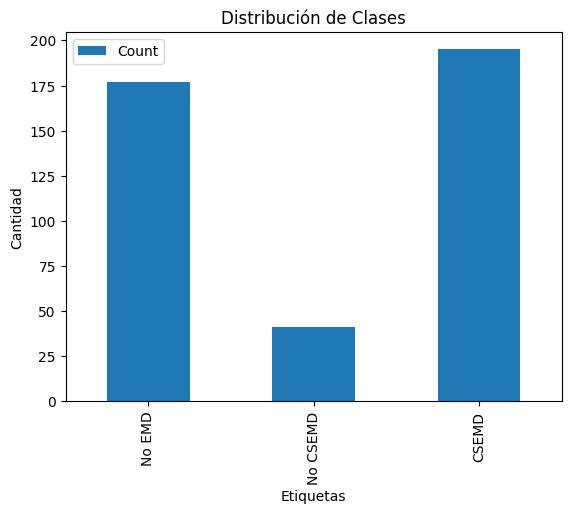

In [14]:
import matplotlib.pyplot as plt
import numpy as np

abreviaturas=("No EMD","No CSEMD","CSEMD")#para idrid parece que es 0= aparentemente no EMD, 1= y 2= EMD severo # en articulos lo clasifican como 0=no EMD, 1= EMD no clinicamente significativo y 2=CSEMD
# Extraer las etiquetas del conjunto de datos
labels_from_dataset = np.array([item[1] for item in dataset])

# Initialize a dictionary to count frequencies
class_counts = {label: 0 for label in abreviaturas}

# Count the frequency of each label
for labels in labels_from_dataset:
    for i, label in enumerate(abreviaturas):
        class_counts[label] += labels[i]

# Create a DataFrame for the counts
counts_df = pd.DataFrame(list(class_counts.items()), columns=['Label', 'Count']).set_index('Label')

# Create the bar chart
plt.figure(figsize=(20, 10))
counts_df.plot(kind='bar')
plt.title('Distribución de Clases')
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad')
plt.show()

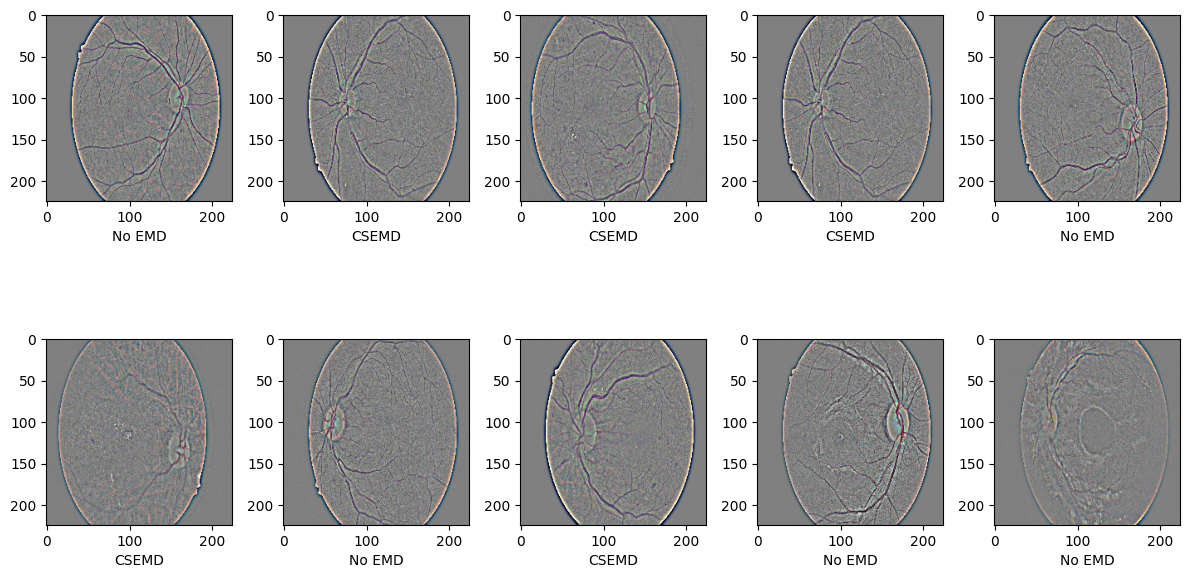

In [15]:
import matplotlib.pyplot as plt
import random

# Definimos las categorías que coinciden con las columnas de etiquetas one-hot de tu DataFrame.
data_category = abreviaturas  # Convertimos las columnas de etiquetas en una lista para su uso posterior.

plt.figure(figsize=(12,7))

for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    label_vector = dataset[sample][1]

    # En lugar de encontrar la clase máxima, buscamos todas las etiquetas positivas.
    labels = [data_category[idx] for idx, value in enumerate(label_vector) if value == 1]
    label_text = ", ".join(labels) if labels else "No Label"  # Creamos un texto con todas las etiquetas.

    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.xlabel(label_text)

plt.tight_layout()
plt.show()  # Muestra el gráfico.

In [16]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [17]:
from sklearn.model_selection import train_test_split

# Supongamos que x e y son tus datos y etiquetas
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.utils.class_weight import compute_sample_weight
y_train_labels = np.argmax(y_train_val,axis=1)#ojo, aqui decia y_train nada mas, pero como no existia, le puse una que si
# Aquí asumimos que y_train_labels es un arreglo de etiquetas para tus datos de entrenamiento
class_weights = compute_sample_weight(class_weight='balanced', y=y_train_labels)

# Ahora class_weights es un arreglo de pesos, uno por cada muestra en y_train_labels
# Si necesitas un diccionario de pesos por clase, puedes hacer lo siguiente:
unique_classes = np.unique(y_train_labels)
cls_wt_dict = {cls: np.mean(class_weights[y_train_labels == cls]) for cls in unique_classes}

print(cls_wt_dict)

{0: 0.7857142857142857, 1: 3.3333333333333335, 2: 0.7006369426751594}


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.efficientnet  import EfficientNetB0
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.densenet  import DenseNet201
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


densenet_weights_path = '/kaggle/input/densenet/keras/densenet121_imagenet/2/model.weights.h5'


densenet = DenseNet121(
    weights="/kaggle/input/densenet/keras/densenet121_imagenet/2/model.weights.h5",
    include_top=False,
    input_shape=(224, 224, 3)
)

#build a model with a densenet layers
def model_build():
    model = tf.keras.Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(3, activation='softmax'))#este es el numero que debe coincidir con las clases

    return model


for layer in densenet.layers:
    layer.trainable = False

for layer in densenet.layers[-32:]:
    layer.trainable = True


model = model_build()#poner nombre model modelousado

In [20]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
n_splits = 5 #5 es este el que debe coicidir con la clase? parece que no
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [21]:
for fold, (train_idx, val_idx) in enumerate(kf.split(x_train_val, y_train_val)):
    print(f"Training on fold {fold+1}/{n_splits}")

    # Dividir los datos
    x_train_fold, y_train_fold = x[train_idx], y[train_idx]
    x_val_fold, y_val_fold = x[val_idx], y[val_idx]
    x_train_fold, y_train_fold = x[train_idx], y[train_idx]
    x_val_fold, y_val_fold = x[val_idx], y[val_idx]
    x_train_fold = x_train_fold.astype('float32')
    y_train_fold = y_train_fold.astype('float32')
    x_val_fold = x_val_fold.astype('float32')
    y_val_fold = y_val_fold.astype('float32')

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])#aqui decia lr=0.0001 pero le puse learning_rate=0.0001

    # Entrenar el modelo
    history = model.fit(
        x_train_fold, y_train_fold,
        batch_size=32, #entre mas grande, mejor entrena, pero mayor costo computacional.
        epochs=20,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr],
      # Asegúrate de que cls_wt_dict esté definido apropiadamente
    )

    # Aquí puedes guardar el modelo o los resultados de cada fold si lo deseas

Training on fold 1/5
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.3925 - loss: 1.2709 - val_accuracy: 0.6061 - val_loss: 0.8475 - learning_rate: 1.0000e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5938 - loss: 0.8920 - val_accuracy: 0.6818 - val_loss: 0.7860 - learning_rate: 1.0000e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6703 - loss: 0.7823 - val_accuracy: 0.7576 - val_loss: 0.7471 - learning_rate: 1.0000e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6910 - loss: 0.7300 - val_accuracy: 0.8030 - val_loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7182 - loss: 0.6908 - val_accuracy: 0.8030 - val_loss: 0.7071 - learning_rate: 1.0000e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7920 - loss: 0.5920 - val_accuracy: 0.8030 - val_loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accur

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,591,947 (32.78 MB)

 Trainable params: 744,195 (2.84 MB)

 Non-trainable params: 6,359,360 (24.26 MB)

 Optimizer params: 1,488,392 (5.68 MB)

In [23]:
print(history.history)

{'accuracy': [1.0, 1.0, 1.0, 0.9924242496490479, 1.0, 0.9962121248245239, 1.0, 1.0, 1.0, 1.0, 0.9924242496490479], 'loss': [0.021652592346072197, 0.011263742111623287, 0.009003090672194958, 0.03085428662598133, 0.009154140017926693, 0.022929318249225616, 0.01013400312513113, 0.011189889162778854, 0.009195283986628056, 0.00846866425126791, 0.05406691133975983], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.006974541582167149, 0.007998955436050892, 0.008800295181572437, 0.008436320349574089, 0.010551768355071545, 0.011380178853869438, 0.02356814779341221, 0.02670842409133911, 0.023130841553211212, 0.016876474022865295, 0.012524421326816082], 'learning_rate': [9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05, 9.999999747378752e-05]}


In [24]:
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
loss, accuracy = model.evaluate(x_test, y_test)
print("loss:", loss)
print("Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.9110 - loss: 0.4003
loss: 0.3390337824821472
Accuracy: 0.9156626462936401


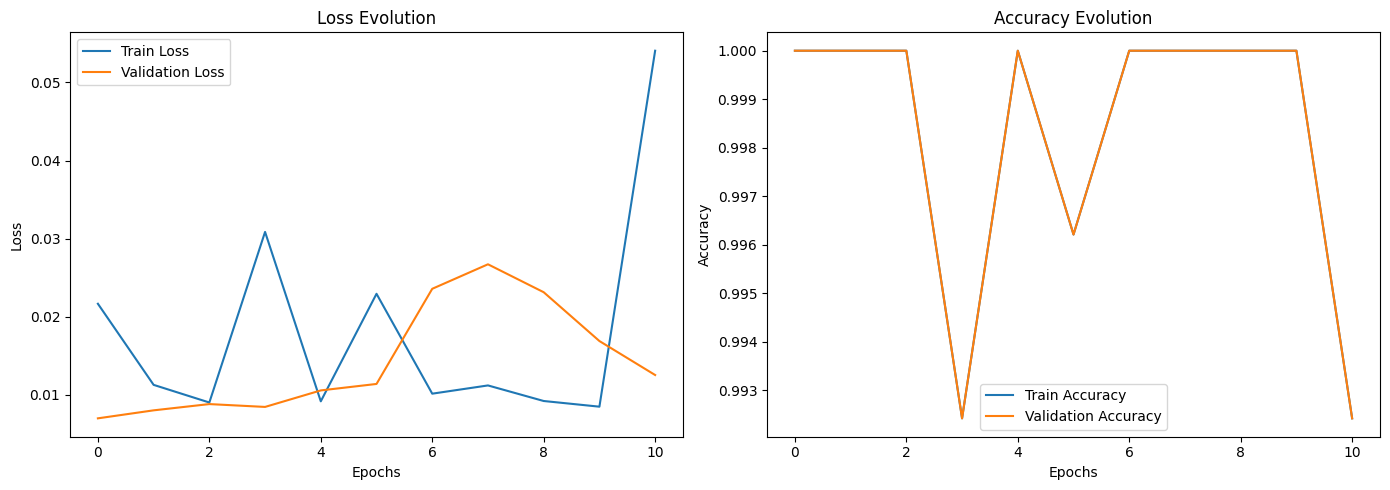

In [25]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step


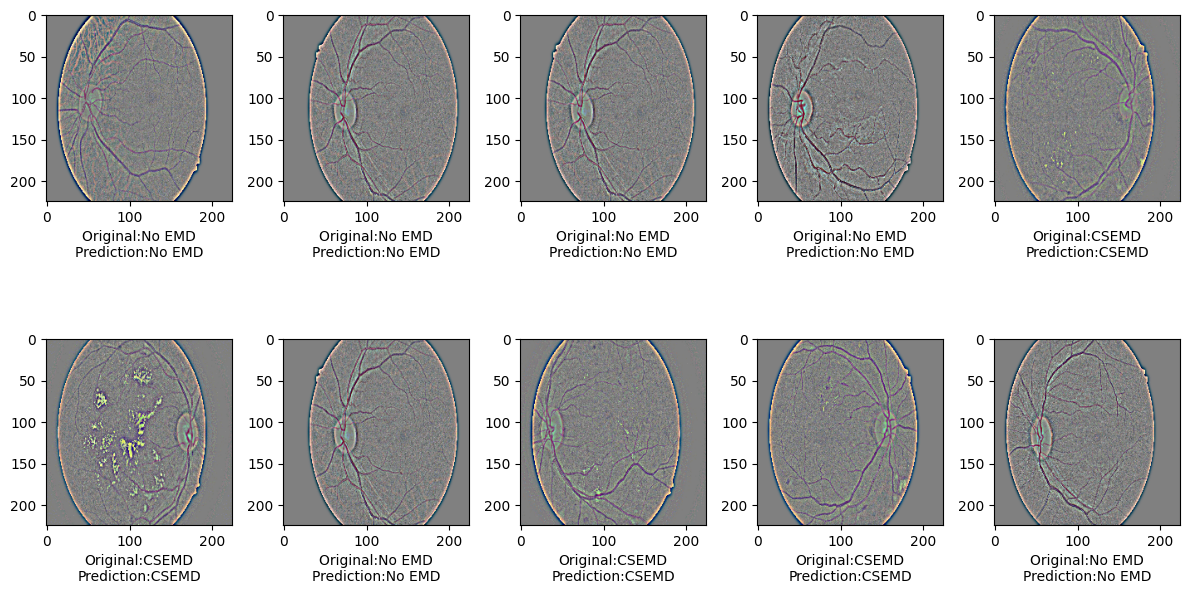

In [26]:
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_true_classes[sample]
    pred_category = y_pred_classes[sample]

    label = abreviaturas[category]
    pred_label = abreviaturas[pred_category]

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Original:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

In [27]:
#codigo de eder para guardar el modelo
import tensorflow as tf
import os
import shutil


# Define the paths for saving the model
keras_path = '/kaggle/working/my_model.keras'
savedmodel_path = '/kaggle/working/my_savedmodel'
tflite_path = '/kaggle/working/my_model.tflite'


# Function to safely save and overwrite if necessary
def safe_save(save_func, path, *args, **kwargs):
    if os.path.exists(path):
        print(f"Overwriting existing file/directory at {path}")
        if os.path.isdir(path):
            shutil.rmtree(path)
        else:
            os.remove(path)
    try:
        save_func(*args, **kwargs)
        print(f"Saved to {path}")
    except Exception as e:
        print(f"Error saving to {path}: {e}")


# Save in Keras (.keras) format
safe_save(model.save, keras_path, keras_path)


# Save in SavedModel format
try:
    if os.path.exists(savedmodel_path):
        shutil.rmtree(savedmodel_path)
    tf.saved_model.save(model, savedmodel_path)
    print(f"Saved to {savedmodel_path}")
except Exception as e:
    print(f"Error saving to {savedmodel_path}: {e}")


# Save in TensorFlow Lite format
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(tflite_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Saved to {tflite_path}")
except Exception as e:
    print(f"Error saving to {tflite_path}: {e}")


# Check if the files exist
print(f"Keras model file exists: {os.path.exists(keras_path)}")
print(f"SavedModel exists: {os.path.exists(savedmodel_path)}")
print(f"TFLite model file exists: {os.path.exists(tflite_path)}")


print("Model saving process completed.")

Saved to /kaggle/working/my_model.keras
Saved to /kaggle/working/my_savedmodel
Saved artifact at '/tmp/tmp5khfb_xd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_471')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133461556873344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701665024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701669248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133461556875632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701665376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701668720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701676112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701673824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133458701674528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

prediction_test = model.predict(x_test)

prediction_test_labels = np.argmax(prediction_test, axis=1)

y_test_labels = np.argmax(y_test, axis=1)


# Configura los parámetros para las métricas
metrics_params = {'average': 'macro', 'zero_division': 1}

# Calcula las métricas para el conjunto de prueba
acc_test = accuracy_score(y_test_labels, prediction_test_labels)
precision_test = precision_score(y_test_labels, prediction_test_labels, **metrics_params)
recall_test = recall_score(y_test_labels, prediction_test_labels, **metrics_params)
f1_test = f1_score(y_test_labels, prediction_test_labels, **metrics_params)


# Añade los resultados a un DataFrame para una visualización más clara
evaluation = pd.DataFrame({
    'Model': ['Neural Network'],

    'Accuracy(test)': [acc_test],
    'Precision(test)': [precision_test],
    'Recall(test)': [recall_test],
    'F1_score(test)': [f1_test],

})

# Muestra las evaluaciones ordenadas por precisión en el conjunto de prueba
print(evaluation.sort_values(by='Accuracy(test)', ascending=False))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
            Model  Accuracy(test)  Precision(test)  Recall(test)  \
0  Neural Network        0.915663         0.882051      0.806543   

   F1_score(test)  
0        0.832492  


In [29]:
#model.summary()
#model.save("EMD.h5")# no sé porqué de repente me dice que no lo puede guadar porque ya existe, sino es verdad.


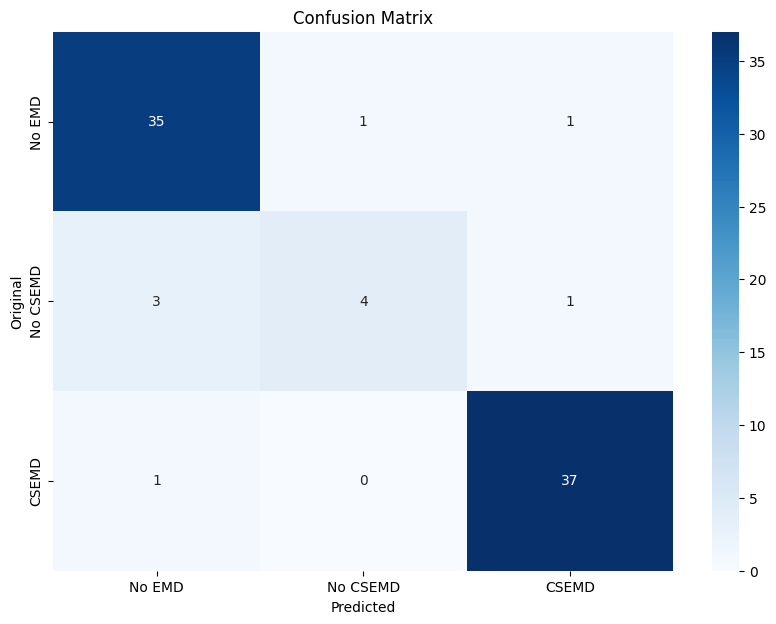

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_true_classes y y_pred_classes son tus datos reales
# y que abreviatura contiene las etiquetas de las clases


# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=abreviaturas, yticklabels=abreviaturas)
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix')
plt.show()

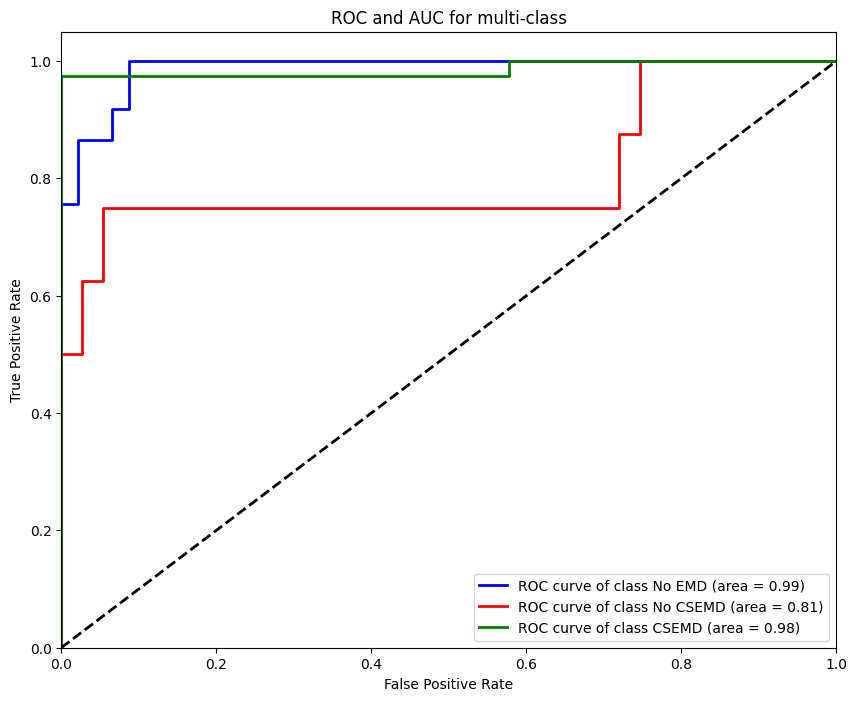

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Calcula la curva ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Visualizar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(abreviaturas[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC for multi-class')
plt.legend(loc="lower right")
plt.show()

In [32]:
# prompt: implements the inceptionV3

from tensorflow.keras.applications.inception_v3 import InceptionV3

# ... (Your existing code) ...


# Load the pre-trained InceptionV3 model without the top layers
inceptionv3 = InceptionV3(
    weights="imagenet",  # You can use other weights like 'imagenet'
    include_top=False,
    input_shape=(224, 224, 3)
)

# Build a model with InceptionV3 layers
def model_build_inception():
    model = tf.keras.Sequential()
    model.add(inceptionv3)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(3, activation='softmax'))  # Adjust output units for your classes

    return model


# Freeze the InceptionV3 layers initially
for layer in inceptionv3.layers:
    layer.trainable = False

# Unfreeze some of the top layers for fine-tuning (optional)
for layer in inceptionv3.layers[-32:]:
    layer.trainable = True


model_inceprionV3 = model_build_inception()
# ... (The rest of your training and evaluation code) ...
 # Compilar el modelo
model_inceprionV3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])#aqui decia lr=0.0001 pero le puse learning_rate=0.0001
    # Entrenar el modelo
history_inceprionV3 = model_inceprionV3.fit(
        x_train_fold, y_train_fold,
        batch_size=32, #entre mas grande, mejor entrena, pero mayor costo computacional.
        epochs=20,
        validation_data=(x_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr],
      # Asegúrate de que cls_wt_dict esté definido apropiadamente
    )


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.5168 - loss: 1.0885 - val_accuracy: 0.5909 - val_loss: 0.9678 - learning_rate: 1.0000e-04
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.9091 - loss: 0.2873 - val_accuracy: 0.5758 - val_loss: 0.9189 - learning_rate: 1.0000e-04
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9673 - loss: 0.1659 - val_accuracy: 0.6364 - val_loss: 0.8499 - learning_rate: 1.0000e-04
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9872 - loss: 0.1097 - val_accuracy: 0.6212 - val_loss: 0.8437 - learning_rate: 1.0000e-04
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9950 - loss: 0.0761 - val_accuracy: 0.6364 - val_loss: 0.8728 - learning_rate: 1.0000e-04
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.5758 - val_loss: 0.9086 - learning_rate: 1.0000e-04
Epoch 7/20
9/9 ━━━━━━━━━━━━━━

In [33]:
model_inceprionV3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,344,363 (131.01 MB)

 Trainable params: 6,204,995 (23.67 MB)

 Non-trainable params: 15,729,376 (60.00 MB)

 Optimizer params: 12,409,992 (47.34 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step


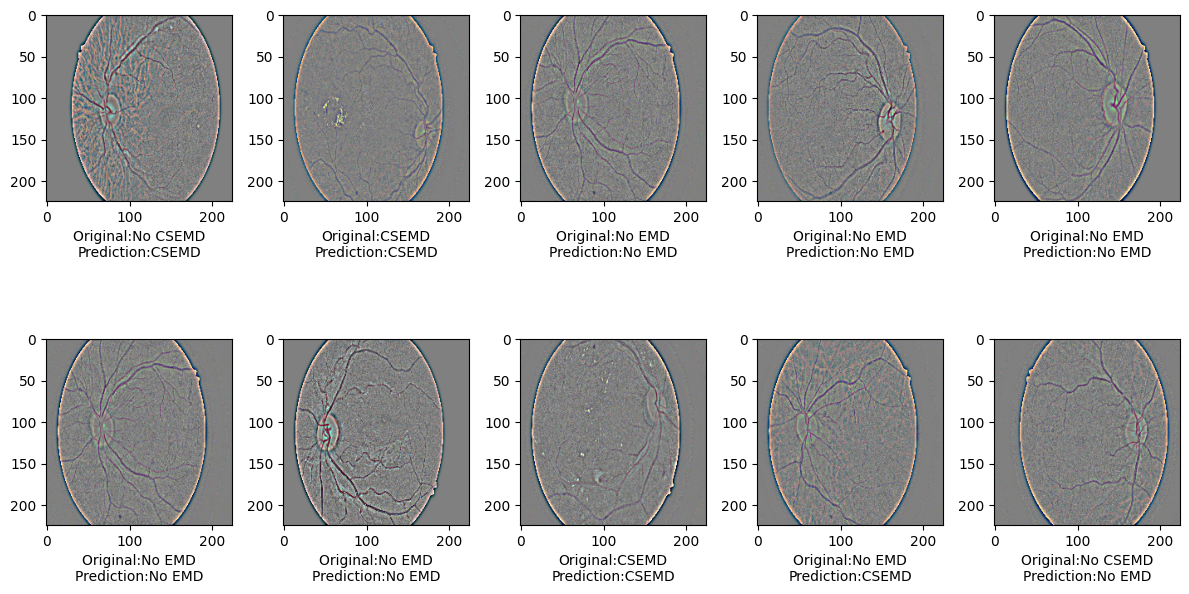

In [34]:
"""para que de las imágenes y su clase y su predicción
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
"""
y_pred_probs = model_inceprionV3.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_true_classes[sample]
    pred_category = y_pred_classes[sample]

    label = abreviaturas[category]
    pred_label = abreviaturas[pred_category]

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Original:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()


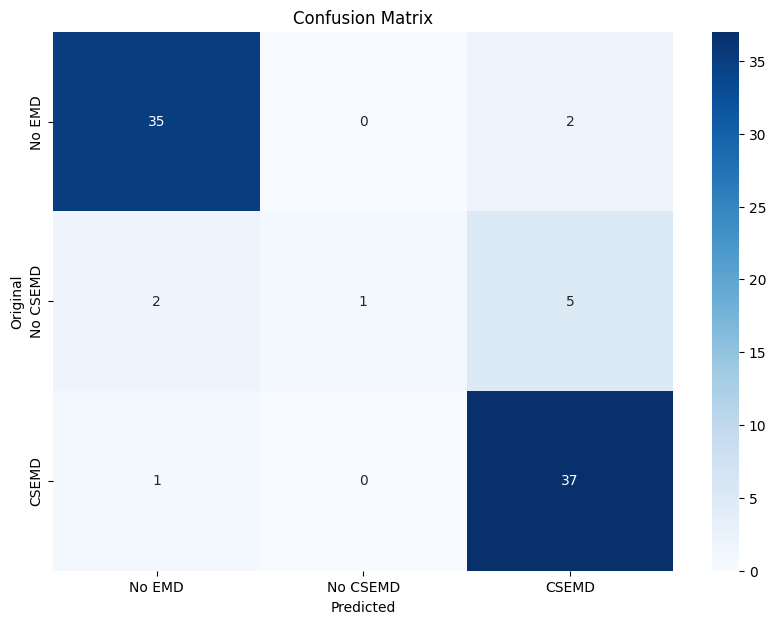

In [35]:
# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=abreviaturas, yticklabels=abreviaturas)
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix')
plt.show()


In [42]:
prediction_test = model_inceprionV3.predict(x_test)

prediction_test_labels = np.argmax(prediction_test, axis=1)

y_test_labels = np.argmax(y_test, axis=1)


# Configura los parámetros para las métricas
metrics_params = {'average': 'macro', 'zero_division': 1}

# Calcula las métricas para el conjunto de prueba
acc_test = accuracy_score(y_test_labels, prediction_test_labels)
precision_test = precision_score(y_test_labels, prediction_test_labels, **metrics_params)
recall_test = recall_score(y_test_labels, prediction_test_labels, **metrics_params)
f1_test = f1_score(y_test_labels, prediction_test_labels, **metrics_params)


# Añade los resultados a un DataFrame para una visualización más clara
evaluation = pd.DataFrame({
    'Model': ['Neural Network'],

    'Accuracy(test)': [acc_test],
    'Precision(test)': [precision_test],
    'Recall(test)': [recall_test],
    'F1_score(test)': [f1_test],

})

# Muestra las evaluaciones ordenadas por precisión en el conjunto de prueba
print(evaluation.sort_values(by='Accuracy(test)', ascending=False))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
            Model  Accuracy(test)  Precision(test)  Recall(test)  \
0  Neural Network        0.879518         0.920654      0.681543   

   F1_score(test)  
0        0.685998  


In [44]:
#implementar otro modelo VGG-16

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

# Load the pre-trained VGG16 model without the top layers
vgg16 = VGG16(
    weights="imagenet",  # You can use other weights like 'imagenet'
    include_top=False,
    input_shape=(224, 224, 3) # Define input shape explicitly
)

# Build a model with VGG16 layers
def model_build_vgg16():
    # Create an input layer with a defined shape
    input_tensor = layers.Input(shape=(224, 224, 3))

    # Pass the input tensor through the VGG16 model
    vgg16_output = vgg16(input_tensor)

    # Add the remaining layers
    x = layers.GlobalAveragePooling2D()(vgg16_output)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    output_tensor = layers.Dense(3, activation='softmax')(x)  # Adjust output units for your classes

    # Create the model
    model = models.Model(inputs=input_tensor, outputs=output_tensor)

    return model


# Freeze the VGG16 layers initially
for layer in vgg16.layers:
    layer.trainable = False

# Unfreeze some of the top layers for fine-tuning (optional)
for layer in vgg16.layers[-32:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True


model_vgg16 = model_build_vgg16()


In [45]:
model_vgg16.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,747,971 (56.26 MB)

 Trainable params: 14,747,843 (56.26 MB)

 Non-trainable params: 128 (512.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step


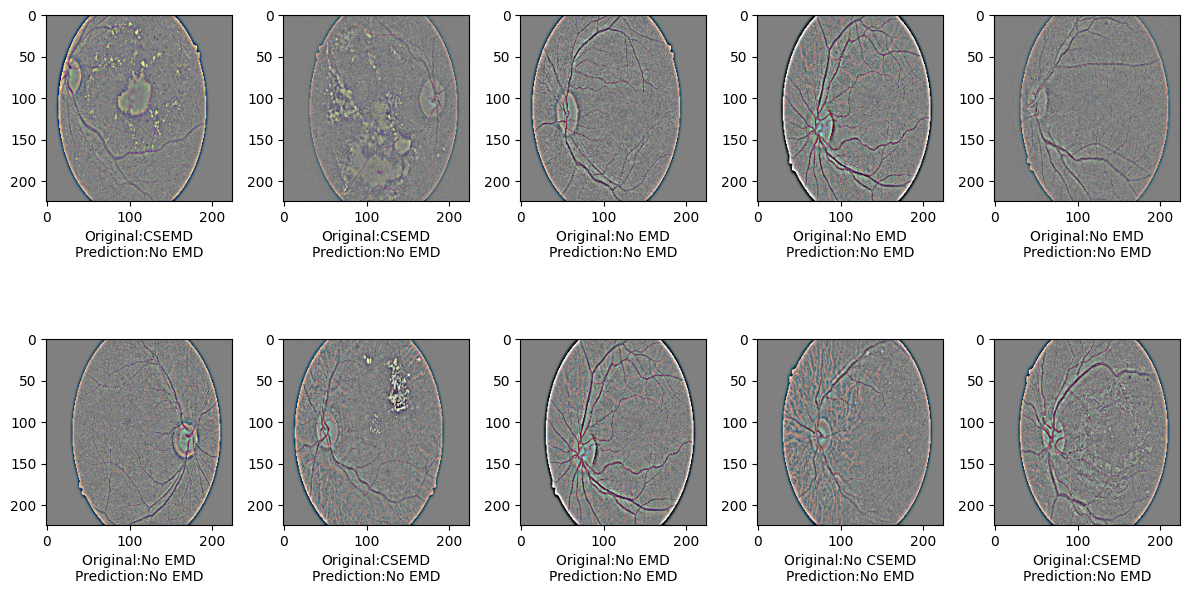

In [46]:
"""para que de las imágenes y su clase y su predicción
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
"""
y_pred_probs = model_vgg16.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_true_classes[sample]
    pred_category = y_pred_classes[sample]

    label = abreviaturas[category]
    pred_label = abreviaturas[pred_category]

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Original:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()


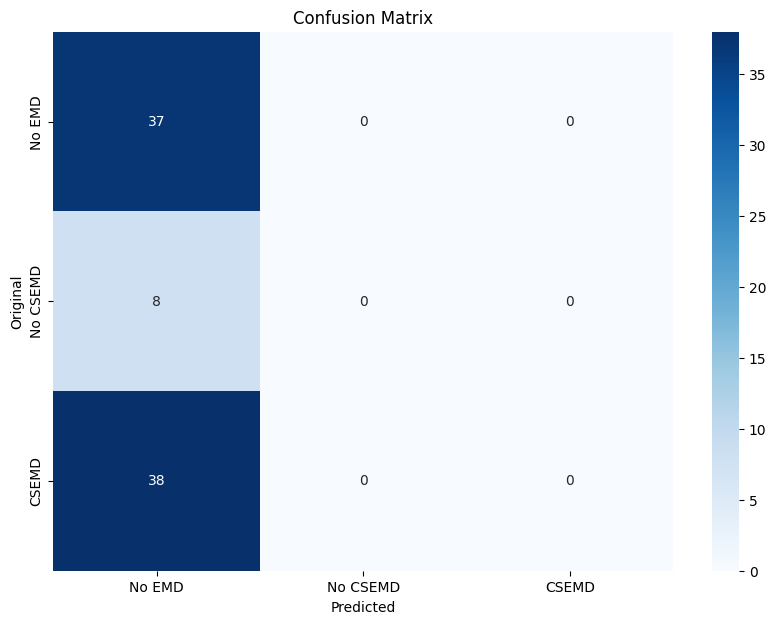

In [47]:
# Matriz de confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=abreviaturas, yticklabels=abreviaturas)
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.title('Confusion Matrix')
plt.show()

In [43]:
prediction_test = model_vgg16.predict(x_test)

prediction_test_labels = np.argmax(prediction_test, axis=1)

y_test_labels = np.argmax(y_test, axis=1)


# Configura los parámetros para las métricas
metrics_params = {'average': 'macro', 'zero_division': 1}

# Calcula las métricas para el conjunto de prueba
acc_test = accuracy_score(y_test_labels, prediction_test_labels)
precision_test = precision_score(y_test_labels, prediction_test_labels, **metrics_params)
recall_test = recall_score(y_test_labels, prediction_test_labels, **metrics_params)
f1_test = f1_score(y_test_labels, prediction_test_labels, **metrics_params)


# Añade los resultados a un DataFrame para una visualización más clara
evaluation = pd.DataFrame({
    'Model': ['Neural Network'],

    'Accuracy(test)': [acc_test],
    'Precision(test)': [precision_test],
    'Recall(test)': [recall_test],
    'F1_score(test)': [f1_test],

})

# Muestra las evaluaciones ordenadas por precisión en el conjunto de prueba
print(evaluation.sort_values(by='Accuracy(test)', ascending=False))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
            Model  Accuracy(test)  Precision(test)  Recall(test)  \
0  Neural Network        0.457831         0.819277      0.333333   

   F1_score(test)  
0        0.209366  
